In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

visualize = False

MICU_admits_clean = pd.read_csv('MICU_admits_clean.csv')

In [2]:
# Define label dataframe 
will_readmit = (MICU_admits_clean.future_readmit == 'Yes')
y_df = pd.DataFrame(will_readmit.map({True: 1, False: 0}))
y_df.columns = ['label']

# Define feature dataframe and split into numerical and categorical features
x_df = MICU_admits_clean.drop(['subject_id','hadm_id','admittime','dischtime','first_careunit','last_careunit','readmit_dt','readmit_last_careunit', 'future_readmit', 'next_readmit_dt'], axis = 1)
x_df_cat = x_df[['gender', 'marital_status', 'insurance']].copy()
x_df_num = x_df.drop(['gender', 'marital_status', 'insurance'], axis = 1)

In [4]:
for key in x_df_cat.keys():
    print (key)

gender
marital_status
insurance


In [5]:
scaled_x_df_num = pd.DataFrame(StandardScaler().fit_transform(x_df_num), columns=x_df_num.keys())

In [6]:
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in scaled_x_df_num.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(scaled_x_df_num[feature],25)
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(scaled_x_df_num[feature],75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    outliers_per_feature = scaled_x_df_num[~((scaled_x_df_num[feature] >= Q1 - step) & (scaled_x_df_num[feature] <= Q3 + step))]
    outliers = outliers + list(outliers_per_feature.index)
outliers.sort()
outliers = list(set(outliers))

# Remove outliers
clean_scaled_x_df_num = scaled_x_df_num.drop(scaled_x_df_num.index[outliers]).reset_index(drop = True)
print('{} outliers removed'.format(len(outliers)))

3682 outliers removed


In [7]:
if visualize:
    # Visualization of numerical feature correlative distributions before scaling and outlier removal 
    fig = pd.scatter_matrix(x_df_num, alpha = 0.3, figsize = (30,30), diagonal = 'kde')
    plt.savefig('figures/scatter_pre.png')
    # Visualization of numerical feature correlative distributions after scaling and outlier removal
    fig = pd.scatter_matrix(clean_scaled_x_df_num, alpha = 0.3, figsize = (30,30), diagonal = 'kde')
    plt.savefig('figures/scatter_post.png')

In [8]:
clean_x_df_cat = x_df_cat.drop(x_df_cat.index[outliers]).reset_index(drop = True)
clean_x_df_cat_ohe = pd.get_dummies(clean_x_df_cat, drop_first=True)

x_df = pd.concat([clean_scaled_x_df_num, clean_x_df_cat_ohe], axis = 1)
y_df = y_df.drop(y_df.index[outliers]).reset_index(drop = True)


print (y_df.label.value_counts())
print ('\nPositive label proportion: ')
print (y_df.label.value_counts()/y_df.shape[0])

0    4397
1     447
Name: label, dtype: int64

Positive label proportion: 
0    0.907721
1    0.092279
Name: label, dtype: float64


C:\Users\Haoyuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


FileNotFoundError: [Errno 2] No such file or directory: 'figures/scatter_detail_pre.png'

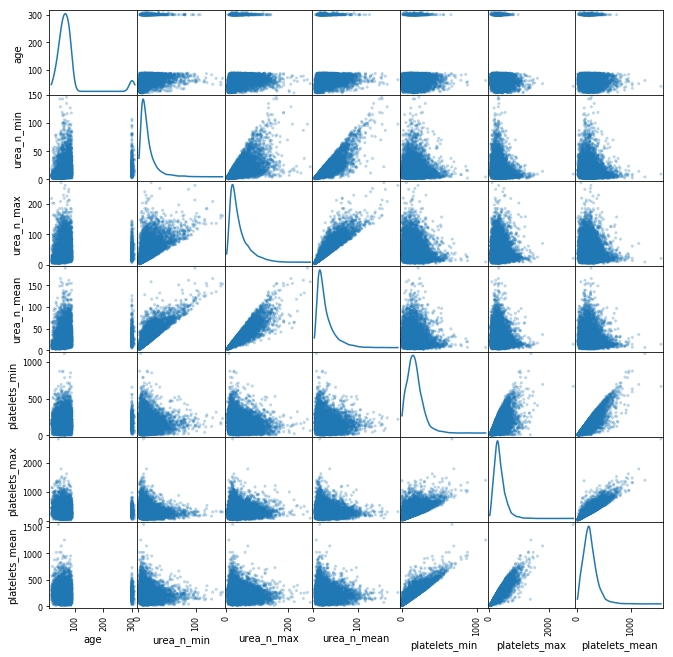

In [10]:
# Save preprocessed Dataframes to csv
x_df.to_csv('x_df.csv')
y_df.to_csv('y_df.csv')
x_df_num.keys()
fig1 = pd.scatter_matrix(x_df_num[x_df_num.keys()[0:7]], alpha = 0.3, figsize = (11,11), diagonal = 'kde')
plt.savefig('figures/scatter_detail_pre.png')
fig2 = pd.scatter_matrix(clean_scaled_x_df_num[clean_scaled_x_df_num.keys()[0:7]], alpha = 0.3, figsize = (11,11), diagonal = 'kde')
plt.savefig('figures/scatter_detail_post.png')

In [11]:
np.sum(x_df_num.isnull())

age               0
urea_n_min        0
urea_n_max        0
urea_n_mean       0
platelets_min     0
platelets_max     0
platelets_mean    0
magnesium_max     0
albumin_min       0
calcium_min       0
resprate_min      0
resprate_max      0
resprate_mean     0
glucose_min       0
glucose_max       0
glucose_mean      0
hr_min            0
hr_max            0
hr_mean           0
sysbp_min         0
sysbp_max         0
sysbp_mean        0
diasbp_min        0
diasbp_max        0
diasbp_mean       0
temp_min          0
temp_max          0
temp_mean         0
dtype: int64